### Data Exploration

This notebook will walk through cleaning the data, explore how the data is structured, understand the distribution of columns and potentially perform feature engineering before we start modeling the data. 

In [2]:
# Importing libraries and reading the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\Priyash Shah\\OneDrive\\Desktop\\ATM_sample.csv")

In [9]:
data.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
2,0.96,2,0,0,0,1,19.189516
3,9.58,9,1,1,0,1,67.388669
4,1.03,4,0,1,0,1,15.813127


Before starting the exploration I want to make sure the data is clean. The info below suggests it is.  
Note that our dataset has 22000 rows and 7 columns.  
Also note that our dependant variable is Withdraw.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  float64
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


Using seaborn I will quickly plot out the relatonships of the data

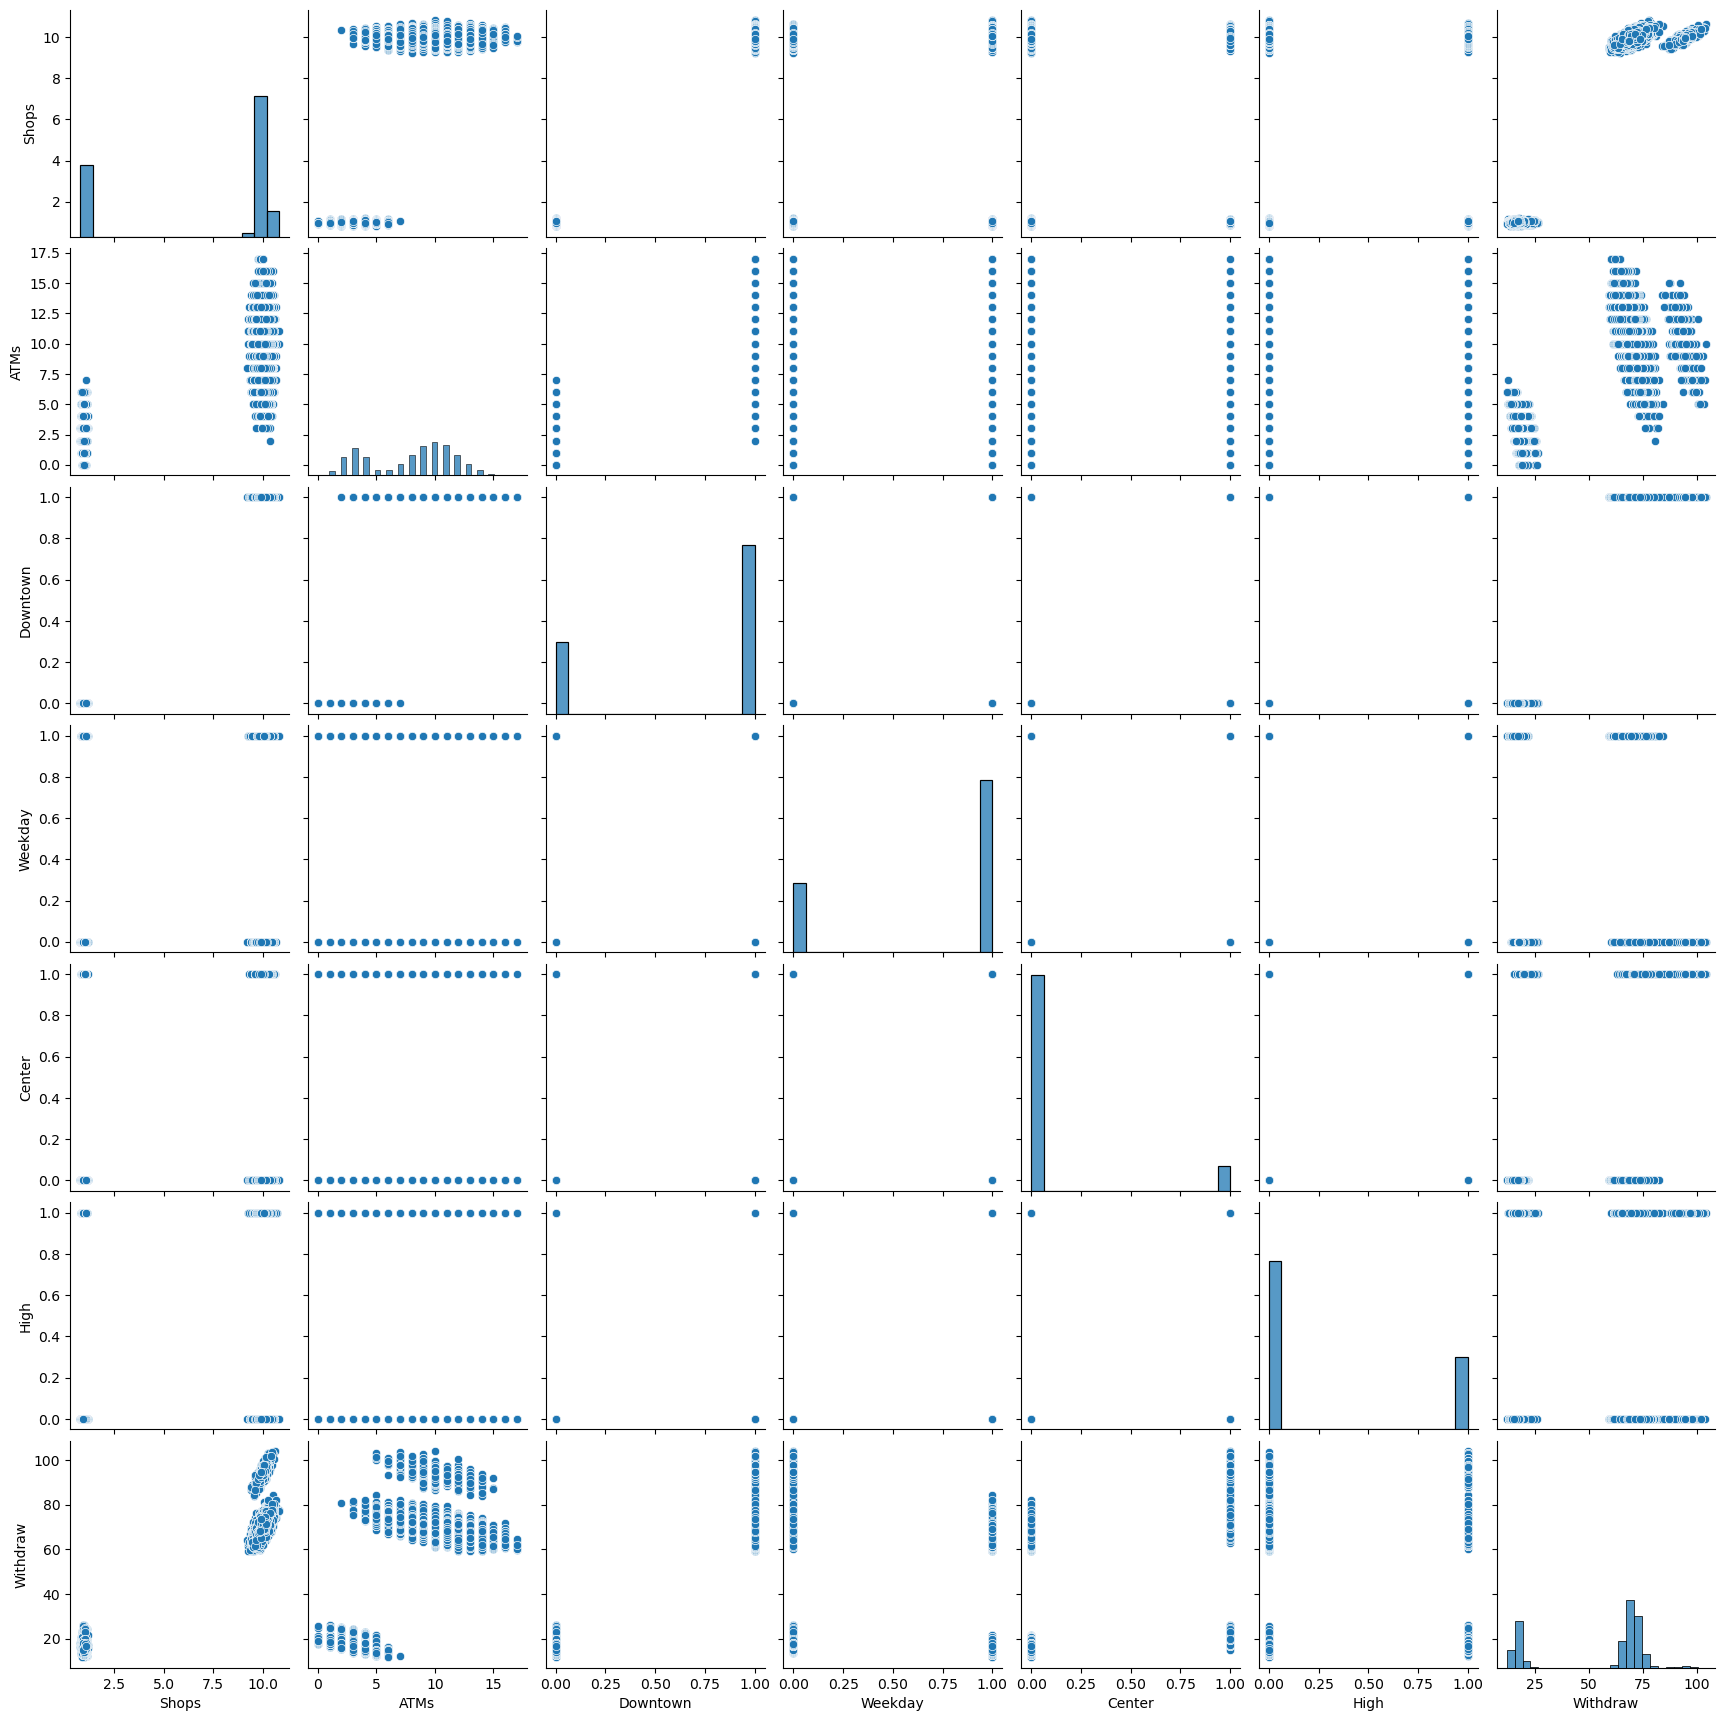

In [6]:
sns.pairplot(data)

It is important to get a correlation matrix for the dataset to help subset the potential models I will be using in the model selection phase.

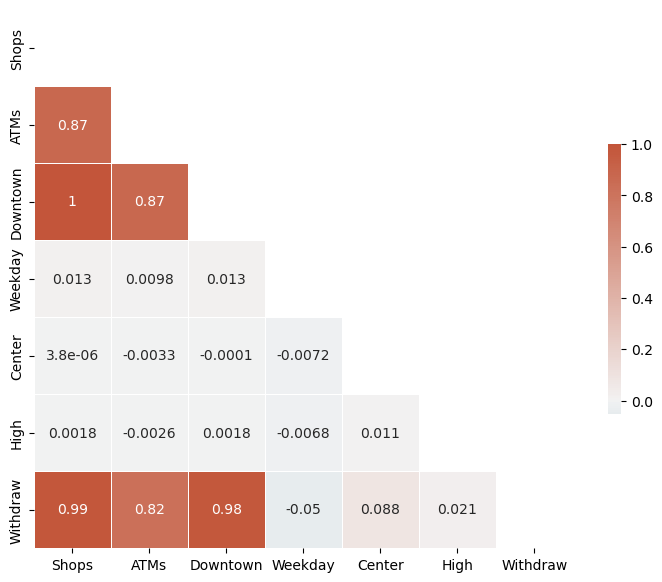

In [16]:
corr = data.corr()

f, ax = plt.subplots(figsize=(9, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))


sns.heatmap(corr, mask = mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Based on the above plot we can see that some of the independent variables are highly correlated with each other. In fact, Shops and Downtown seems to be perfectly correlated. We need to note this especially if we use linear regression models as it is a direct violation to its assumption.

### Distribution of variables.
We now want to closely look at specific histograms from the sns plots above

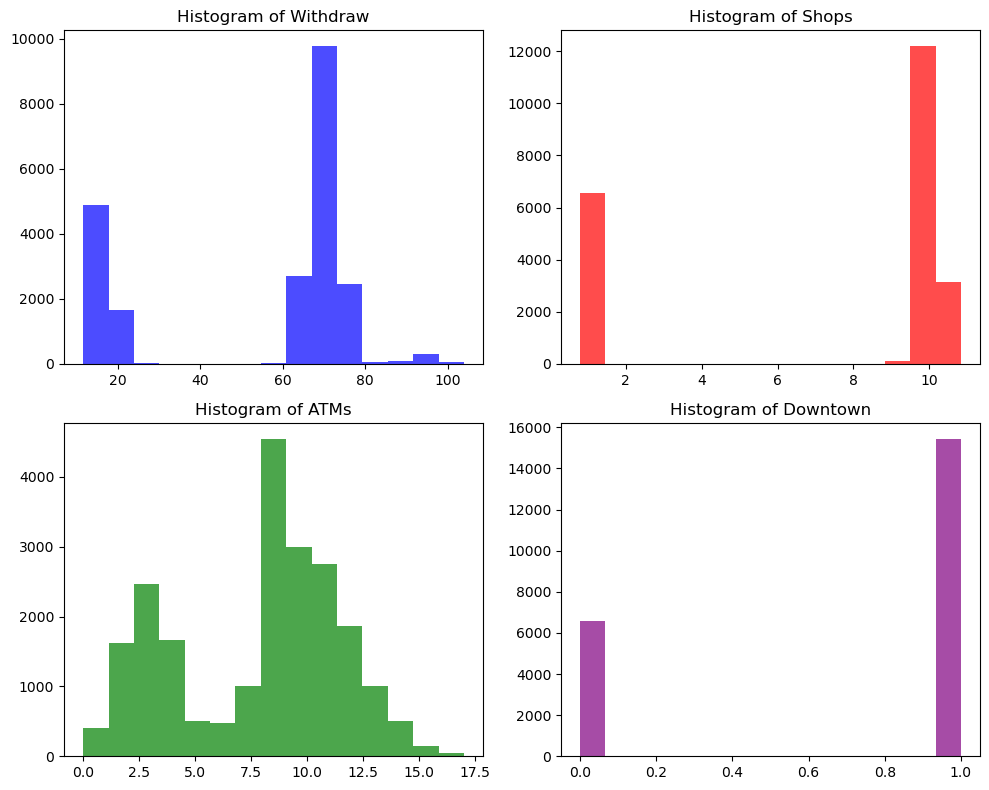

In [60]:
# Plotting a histograms

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

axs[0, 0].hist(data["Withdraw"], bins=15, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Withdraw')

axs[0, 1].hist(data["Shops"], bins=15, color='red', alpha=0.7)
axs[0, 1].set_title('Histogram of Shops')

axs[1, 0].hist(data["ATMs"], bins=15, color='green', alpha=0.7)
axs[1, 0].set_title('Histogram of ATMs')

axs[1, 1].hist(data["Downtown"], bins=15, color='purple', alpha=0.7)
axs[1, 1].set_title('Histogram of Downtown')

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()


We can clearly see that we are currently dealing with intervals of data that are not available. This will play a big role in our prediction modelling, especially when we try to predict future data within that missing interval.  
  
A potential solution for this is dropping Shops from our predictor in our models in the future, we are able to do this since we can see that shops as a variable is perfectly correlated with ATMs in our sample dataset.

### Potential Solutions:
#### A possible solution to overcome this gap in an independent variable is by adding interaction terms

#### We may need to look into Synthetic Data Generation: techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used for imbalanced classification problems. 



### Checking the Distribution of 'Withdraw' with respect to number of shops respectively

This information could be used to potentially use simulation to get estimates of Withdrawals at 'Shops' we do not have information on e.g. Shop = 3,4,5,etc.  
If we end up using this approach we need to note that it will be very risky since we are assuming similarity of data with little information.

In [14]:
shop_1 = data[(data['Shops'] >= 0) & (data['Shops'] < 1)]
shop_9 = data[(data['Shops'] >= 9) & (data['Shops'] < 10)]
shop_10 = data[(data['Shops'] >= 10) & (data['Shops'] <= 11)]

Text(0.5, 1.0, 'Histogram of All')

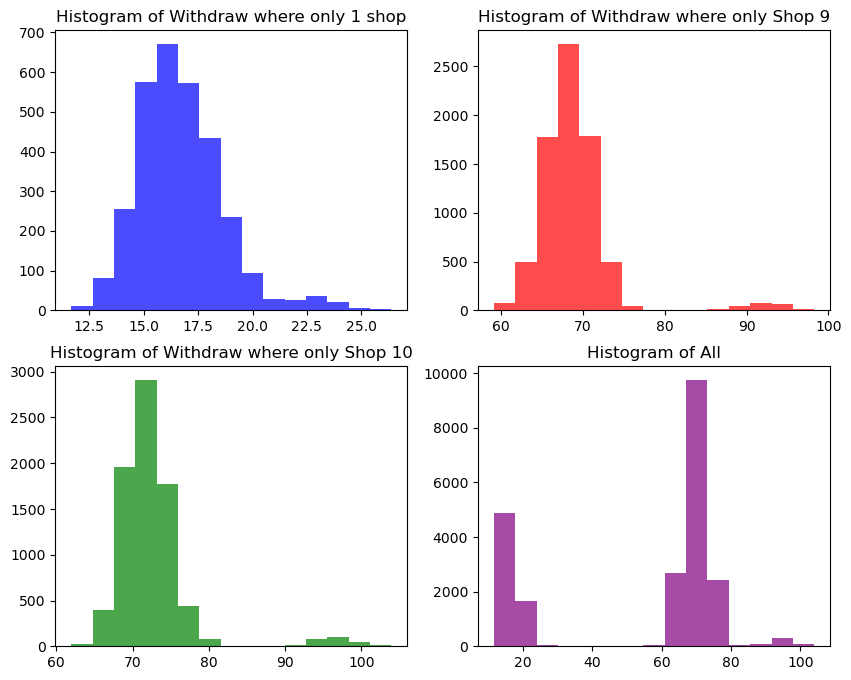

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots

axs[0, 0].hist(shop_1["Withdraw"], bins=15, color='blue', alpha=0.7)
axs[0, 0].set_title('Histogram of Withdraw where only 1 shop')

axs[0, 1].hist(shop_9["Withdraw"], bins=15, color='red', alpha=0.7)
axs[0, 1].set_title('Histogram of Withdraw where only Shop 9')

axs[1, 0].hist(shop_10["Withdraw"], bins=15, color='green', alpha=0.7)
axs[1, 0].set_title('Histogram of Withdraw where only Shop 10')

axs[1, 1].hist(data["Withdraw"], bins=15, color='purple', alpha=0.7)
axs[1, 1].set_title('Histogram of All')


From the above plots we can see that the distribution of Withdraw with respect to number of shops looks to be similar to each other. The difference seems to be the total withdrawal decreasing as the number of shops decrease.


The rate of change of withdrawal between shop 10 and shop 9 is similar to the rate of change of withdrawal between shop 10 and 1. This extrapolation is very RISKY but could be considered

In [50]:
all_shops = set(data["Shops"])
all_shops

{0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 9.22,
 9.26,
 9.27,
 9.28,
 9.3,
 9.31,
 9.32,
 9.34,
 9.35,
 9.36,
 9.37,
 9.38,
 9.39,
 9.4,
 9.41,
 9.42,
 9.43,
 9.44,
 9.45,
 9.46,
 9.47,
 9.48,
 9.49,
 9.5,
 9.51,
 9.52,
 9.53,
 9.54,
 9.55,
 9.56,
 9.57,
 9.58,
 9.59,
 9.6,
 9.61,
 9.62,
 9.63,
 9.64,
 9.65,
 9.66,
 9.67,
 9.68,
 9.69,
 9.7,
 9.71,
 9.72,
 9.73,
 9.74,
 9.75,
 9.76,
 9.77,
 9.78,
 9.79,
 9.8,
 9.81,
 9.82,
 9.83,
 9.84,
 9.85,
 9.86,
 9.87,
 9.88,
 9.89,
 9.9,
 9.91,
 9.92,
 9.93,
 9.94,
 9.95,
 9.96,
 9.97,
 9.98,
 9.99,
 10.0,
 10.01,
 10.02,
 10.03,
 10.04,
 10.05,
 10.06,
 10.07,
 10.08,
 10.09,
 10.1,
 10.11,
 10.12,
 10.13,
 10.14,
 10.15,
 10.16,
 10.17,
 10.18,
 10.19,
 10.2,
 10.21,
 10.22,
 10.23,
 10.24,
 10.25,
 10.26,
 10.27,
 10.28

In [5]:
shop_8_9 = pd.DataFrame(data[(data["Shops"] >= 8)])
shop_8_9

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,10.18,10,1,0,0,0,72.750556
1,9.74,10,1,1,0,0,66.720482
3,9.58,9,1,1,0,1,67.388669
5,9.92,10,1,1,1,0,71.037156
6,10.15,13,1,0,0,0,69.317197
...,...,...,...,...,...,...,...
21990,10.08,11,1,1,0,1,69.214965
21991,9.84,11,1,0,0,0,68.437469
21993,10.13,10,1,0,0,0,72.241268
21995,10.15,12,1,0,0,0,71.384290


In [17]:
import statsmodels.formula.api as smf

formula = 'Withdraw ~ Shops'

slr = smf.ols(formula = formula, data = shop_8_9)

slr = slr.fit()

slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Withdraw   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3413.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:42:54   Log-Likelihood:                -45987.
No. Observations:               15444   AIC:                         9.198e+04
Df Residuals:                   15442   BIC:                         9.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.7489      1.892    -21.012      0.000     -43.457     -36.041
Shops         11.0514      0.189     58.418      0.000      10.681      11.422
==============================================================================
Omnibus:                    11635.370   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197590.357
Skew:                           3.590   Prob(JB):                         0.00
Kurtosis:                      18.985   Cond. No.                         500.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import statistics as stat
stat.mean(shop_9["Withdraw"])

68.88157448611899

In [26]:
stat.mean(shop_10["Withdraw"])

72.54178695528735

In [28]:
stat.mean(shop_1["Withdraw"])

16.70990724176181

In [39]:
data_to_predict = shop_1["Withdraw"]
data_to_predict

2        19.189516
11       19.922406
14       22.594808
16       15.561508
17       15.740448
           ...    
21957    14.012471
21960    15.876349
21974    18.307548
21976    18.081703
21997    14.968847
Name: Withdraw, Length: 3048, dtype: float64

Would it be possible to use the change in mean to predict withrawal in data